# ANALISIS DE VENTAS DE UNA CAFETERIA

Importamos las librerias necesarias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el DataSet

In [5]:
df = pd.read_excel('CoffeeShopSales.xlsx')

Mostrar las primeras filas para verificar que se cargo correctamente

In [6]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


## Analizar como han evolucionado las ventas de Maven Roaster
Agrupar los datos por fecha para ver como varian las ventas diarias, mensuales y anuales

In [7]:
# Convertir la columna 'transaction_date' a tipo datetime si no esta en ese formato
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Agrupar por fecha y sumar las ventas diarias
daily_sales = df.groupby('transaction_date')['unit_price'].sum()

# Converitr a DataFrame para segurar de tneer un indice adeucado
daily_sales = daily_sales.reset_index()

print(daily_sales.head())

  transaction_date  unit_price
0       2023-01-01     1731.80
1       2023-01-02     1743.95
2       2023-01-03     1826.60
3       2023-01-04     1533.40
4       2023-01-05     1715.35


Visualizacion de las tendencias de ventas

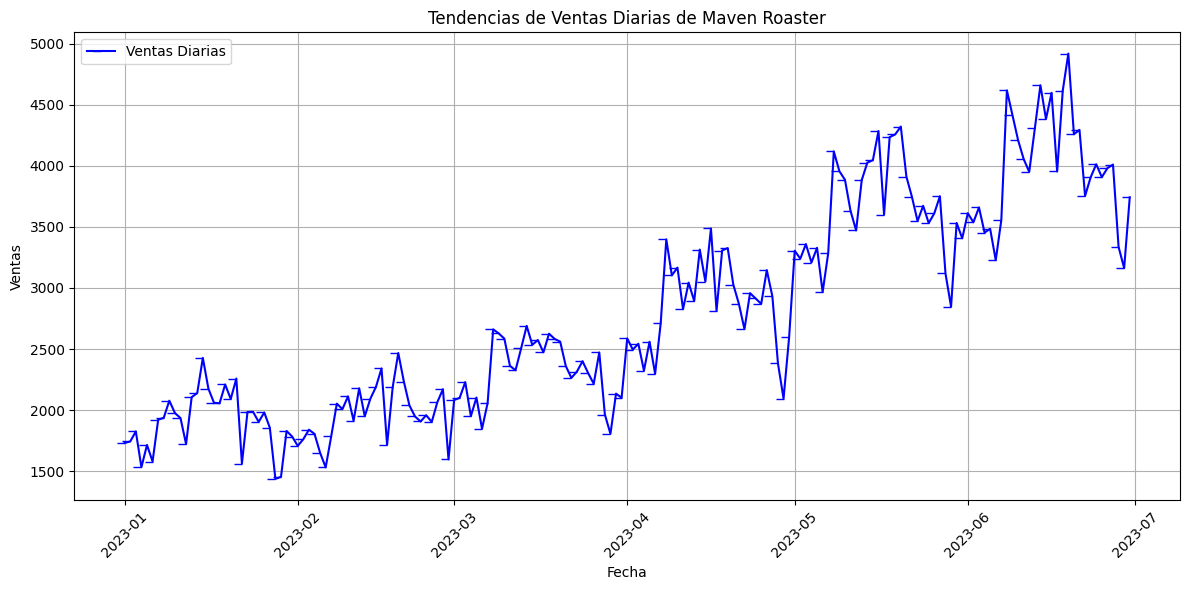

In [8]:
# Configurar el tamano del grafico
plt.figure(figsize=(12,6))

# Graficar las ventas diarias
plt.plot(daily_sales['transaction_date'], daily_sales['unit_price'], marker=0, linestyle='-', color='b', label='Ventas Diarias')

# Configurar etiquetas y titulo
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Tendencias de Ventas Diarias de Maven Roaster')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar leyenda y graficar
plt.legend()
plt.tight_layout()
plt.show()

## Que dias de la semana tienden a ser los mas ocupados

In [9]:
# Extraer el dia de la semana (0: lunes, 6:domingo)
df['day_of_week'] = df['transaction_date'].dt.dayofweek

# Agrupar por dia de la semana y calcular el promedio de ventas
daily_sales_by_day = df.groupby('day_of_week')['unit_price'].mean()

# Renombar los dias para mejor visualizacion
dias_semana = ['Lunes', 'Martes', 'Miercoes', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
daily_sales_by_day.index = dias_semana

print(daily_sales_by_day)

Lunes       3.369199
Martes      3.391967
Miercoes    3.403336
Jueves      3.356859
Viernes     3.373061
Sabado      3.382176
Domingo     3.399944
Name: unit_price, dtype: float64


Visualizacion de los dias de la semana

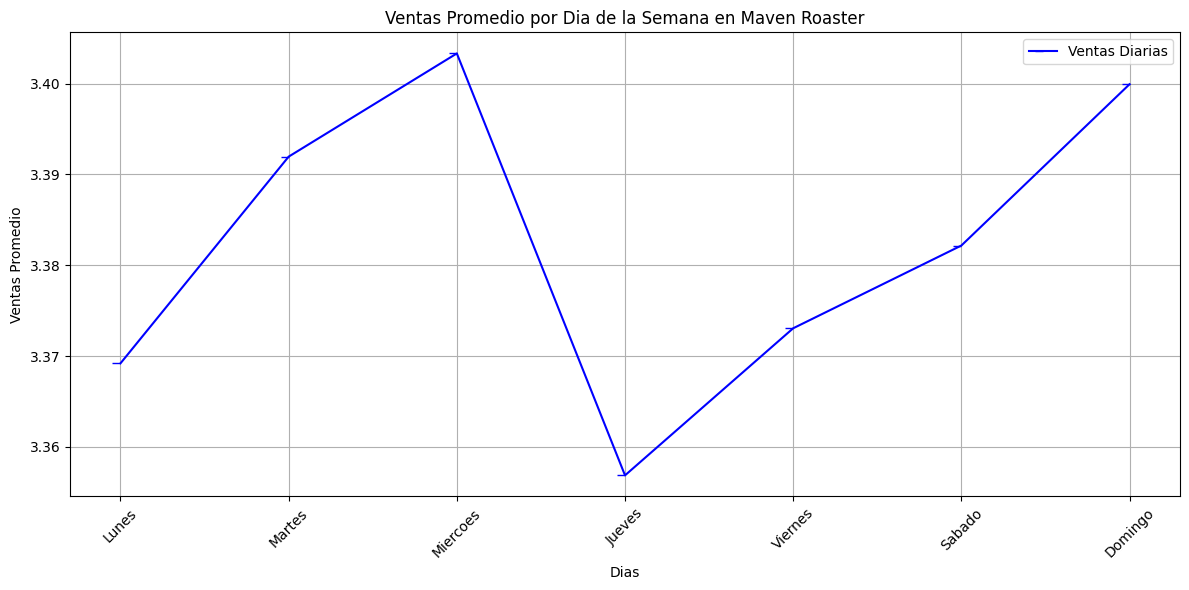

In [10]:
# Configurar el tamano del grafico
plt.figure(figsize=(12,6))

# Graficar las ventas diarias
plt.plot(dias_semana, daily_sales_by_day, marker=0, linestyle='-', color='b', label='Ventas Diarias')

# Configurar etiquetas y titulo
plt.xlabel('Dias')
plt.ylabel('Ventas Promedio')
plt.title('Ventas Promedio por Dia de la Semana en Maven Roaster')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar leyenda y graficar
plt.legend()
plt.tight_layout()
plt.show()

## Que productos se venden mas y cuales menos

In [11]:
# Agrupar por producto y calcular la suma total de las unidades vendidas
total_units_sold = df.groupby('product_detail')['transaction_qty'].sum()

# Ordenar los productos por unidades vendidas de mayor a menor
total_units_sold = total_units_sold.sort_values(ascending=False)

# Mostrar los productos mas vendidos y sus unidades vendidas
top_products_sold = total_units_sold.head(10)
bottom_products_sold = total_units_sold.tail(10)


print(f'Productos mas vendidos: {top_products_sold}')
print(f'Productos mas vendidos: {bottom_products_sold}')

Productos mas vendidos: product_detail
Earl Grey Rg                   4708
Dark chocolate Lg              4668
Morning Sunrise Chai Rg        4643
Latte                          4602
Peppermint Rg                  4564
Columbian Medium Roast Rg      4547
Traditional Blend Chai Rg      4512
Latte Rg                       4497
Our Old Time Diner Blend Sm    4484
Serenity Green Tea Rg          4477
Name: transaction_qty, dtype: int64
Productos mas vendidos: product_detail
Traditional Blend Chai          153
Lemon Grass                     152
Primo Espresso Roast            150
Chili Mayan                     148
Columbian Medium Roast          148
Jamacian Coffee River           146
Earl Grey                       142
Guatemalan Sustainably Grown    134
Spicy Eye Opener Chai           122
Dark chocolate                  118
Name: transaction_qty, dtype: int64


Visualizacion de los productos mas vendidos

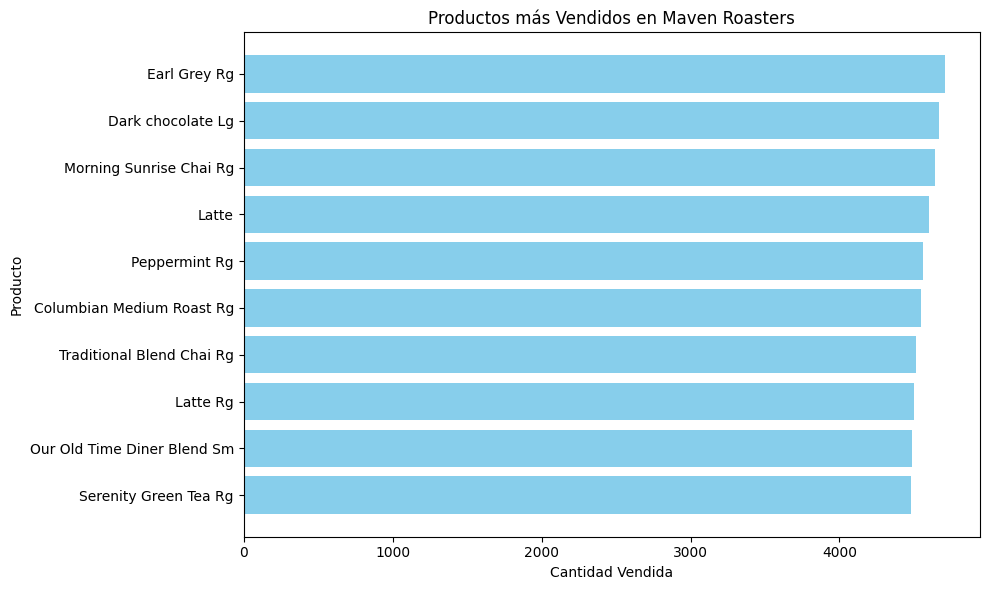

In [12]:

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar los productos más vendidos
plt.barh(top_products_sold.index, top_products_sold.values, color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.title('Productos más Vendidos en Maven Roasters')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el producto más vendido en la parte superior

# Mostrar el gráfico
plt.tight_layout()
plt.show()




Visualizacion de los productos menos vendidos

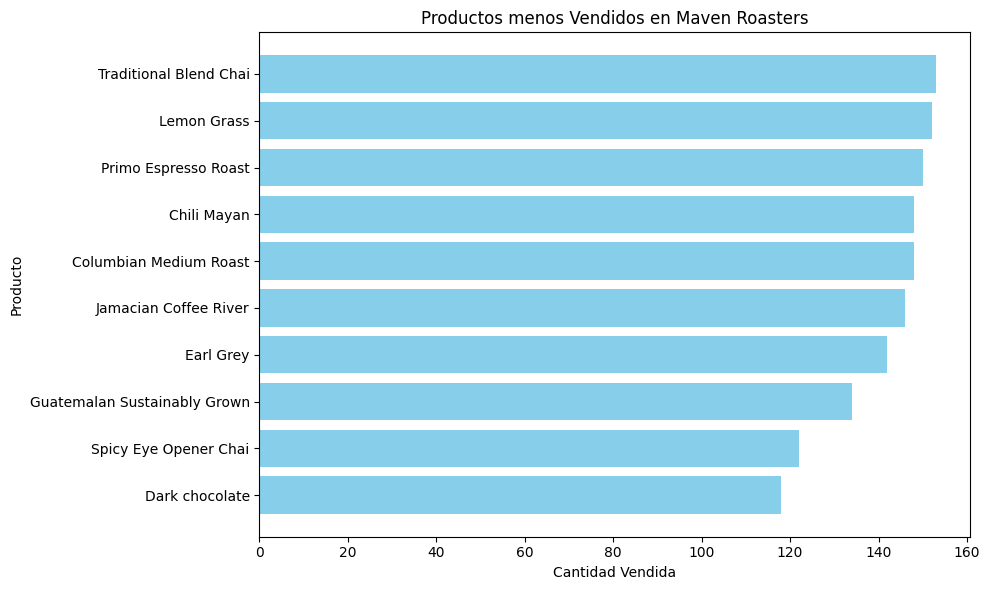

In [13]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar los productos más vendidos
plt.barh(bottom_products_sold.index, bottom_products_sold.values, color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.title('Productos menos Vendidos en Maven Roasters')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el producto más vendido en la parte superior

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Que productos generan mas ingresos para el negocio

In [14]:
# Agrupar los ingresos generados por producto
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Agrupar por producto y calcular los ingresos totales
total_revenue_by_product = df.groupby('product_detail')['total_revenue'].sum()

# Ordenar los productos por ingresos de mayor a menor
total_revenue_by_product = total_revenue_by_product.sort_values(ascending=False)

print(total_revenue_by_product.head(10))


product_detail
Sustainably Grown Organic Lg    21151.75
Dark chocolate Lg               21006.00
Latte Rg                        19112.25
Cappuccino Lg                   17641.75
Morning Sunrise Chai Lg         17384.00
Latte                           17257.50
Jamaican Coffee River Lg        16481.25
Sustainably Grown Organic Rg    16233.75
Cappuccino                      15997.50
Brazilian Lg                    15109.50
Name: total_revenue, dtype: float64


Visualizacion de los datos

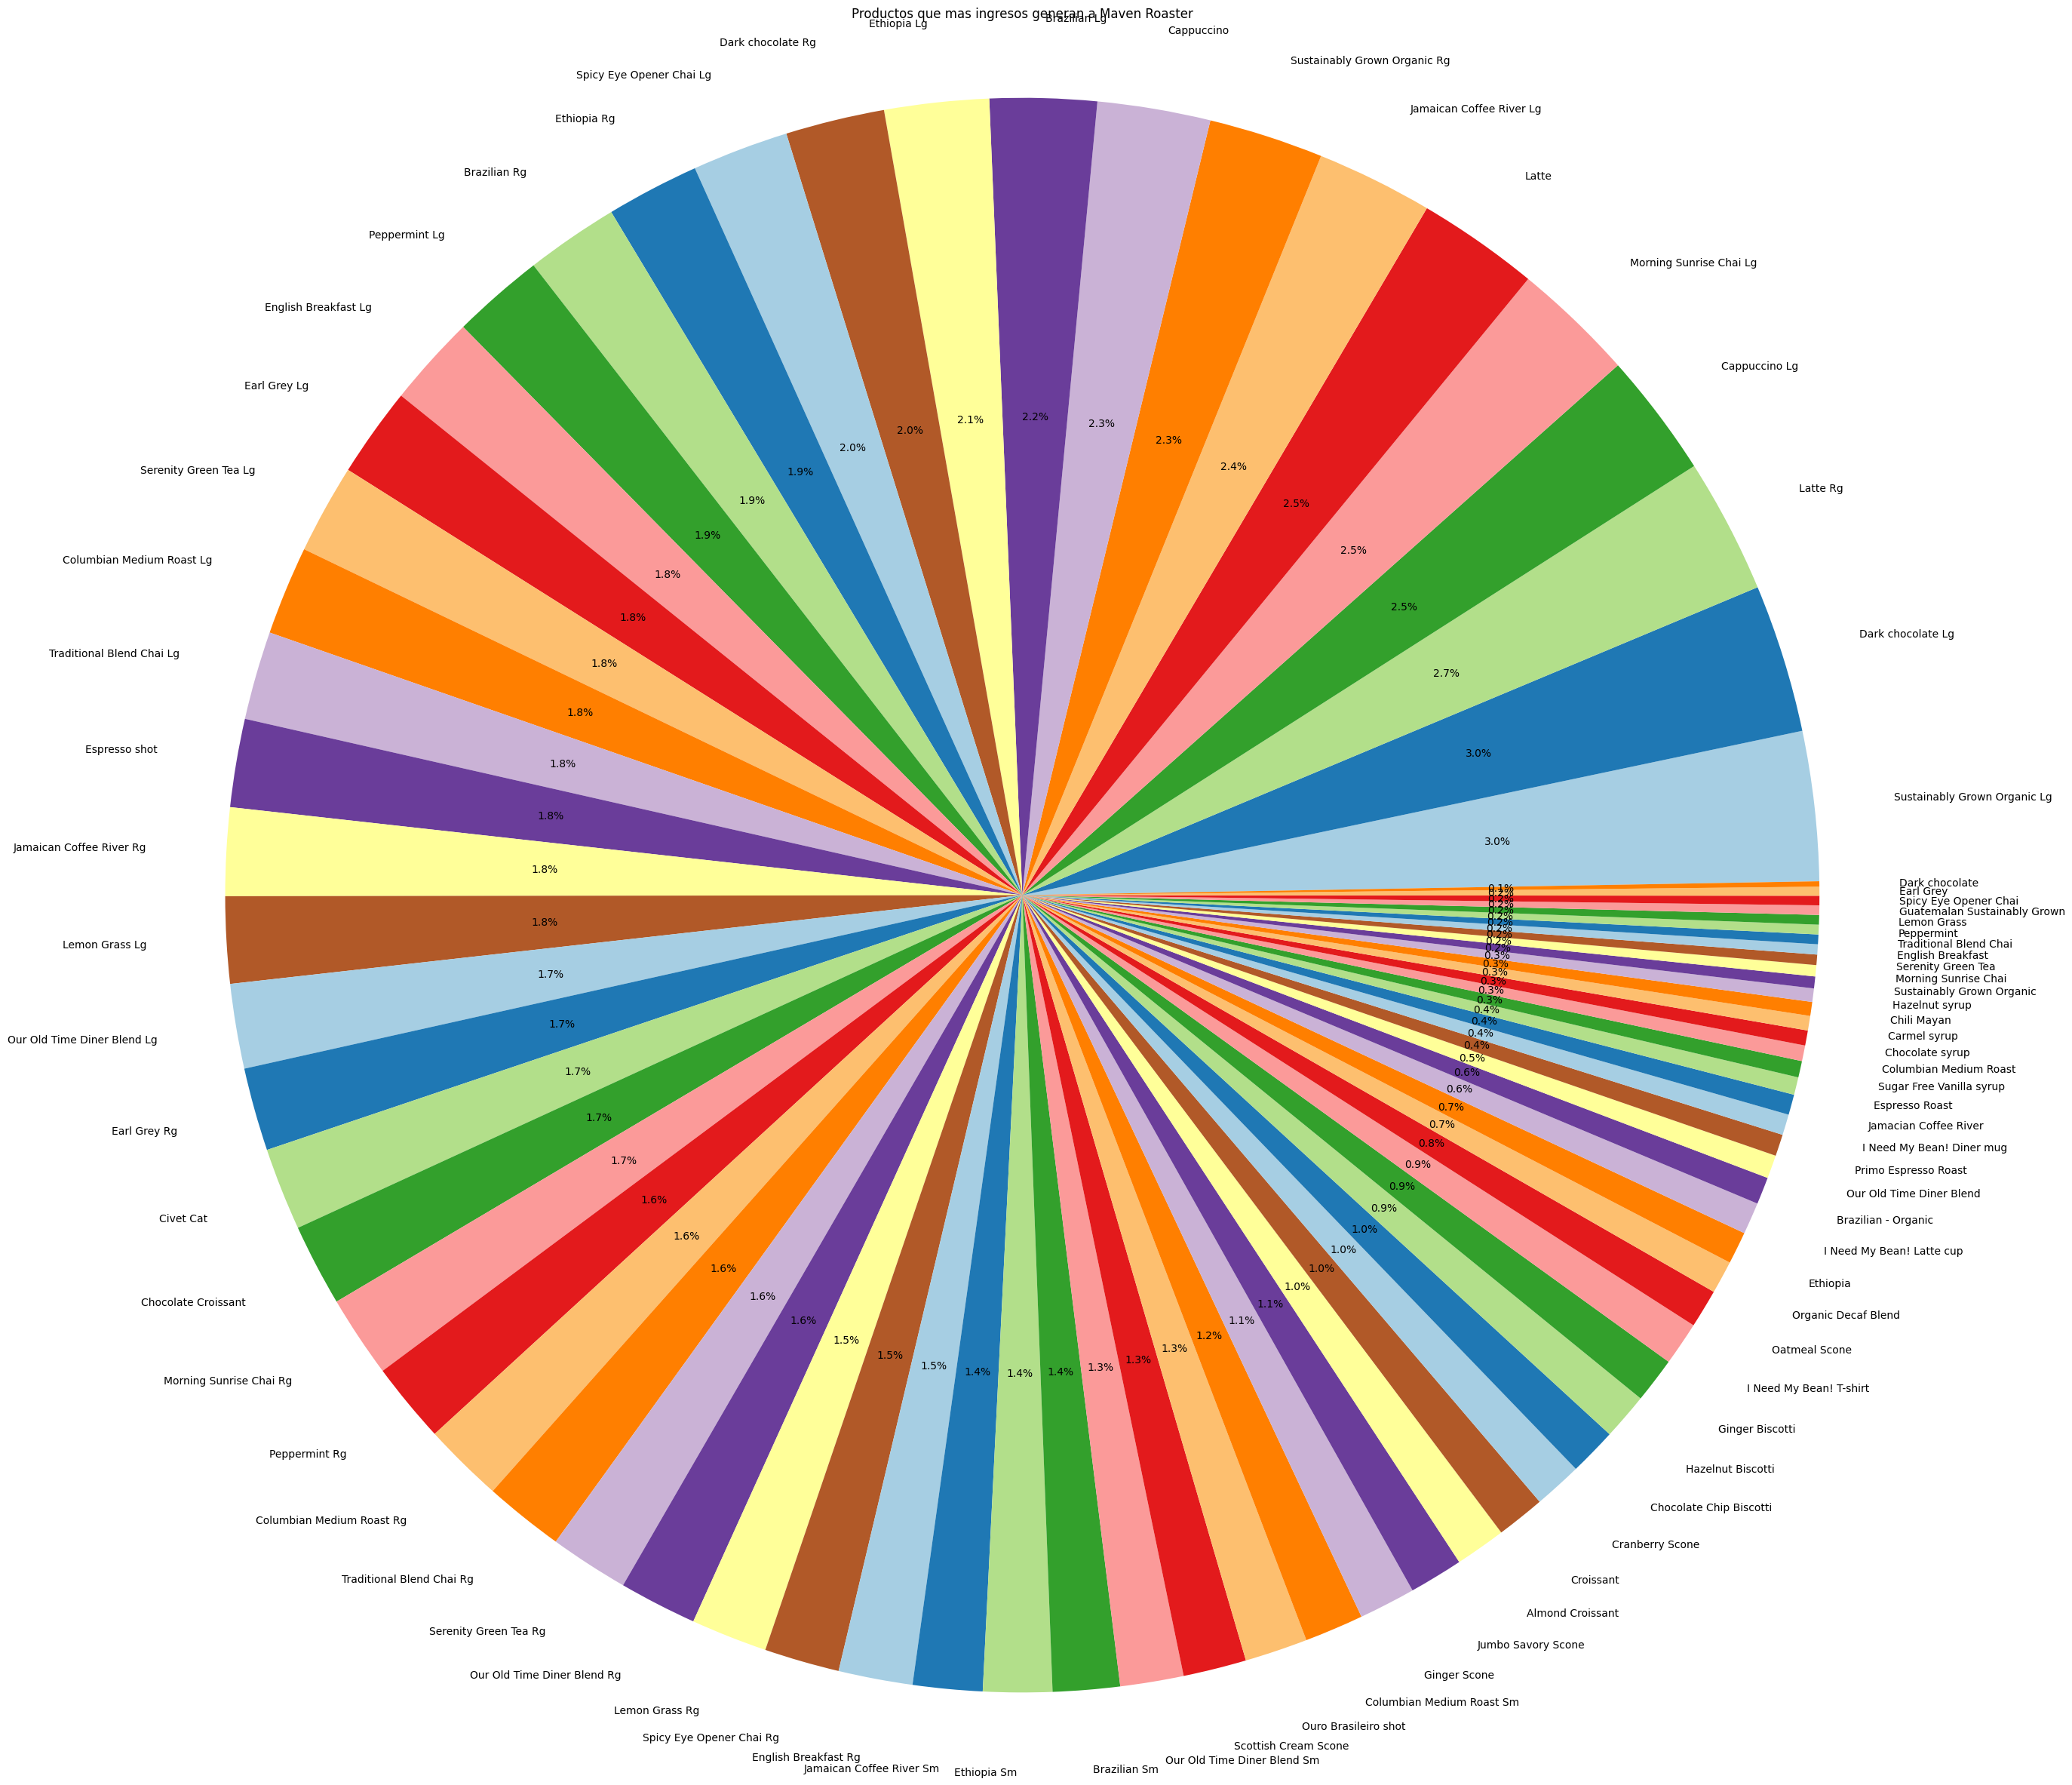

In [26]:
top_revenue_products = total_revenue_by_product

plt.figure(figsize=(30, 30))

plt.pie(top_revenue_products.values, labels=top_revenue_products.index, autopct='%1.1f%%', startangle=1, colors=plt.cm.Paired.colors)

plt.title('Productos que mas ingresos generan a Maven Roaster')

plt.axis('equal')
plt.show()

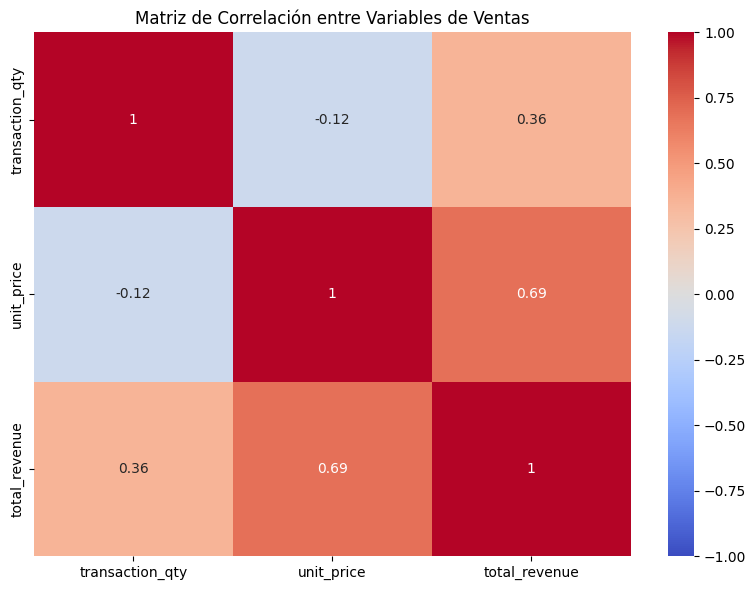


Matriz de correlación:
                 transaction_qty  unit_price  total_revenue
transaction_qty         1.000000   -0.123546       0.356231
unit_price             -0.123546    1.000000       0.685550
total_revenue           0.356231    0.685550       1.000000


In [16]:
# Crear un DataFrame con las variables que queremos correlacionar
correlation_df = df[['transaction_qty', 'unit_price', 'total_revenue']]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables de Ventas')
plt.tight_layout()
plt.show()

# Mostrar los valores numéricos
print("\nMatriz de correlación:")
print(correlation_matrix)

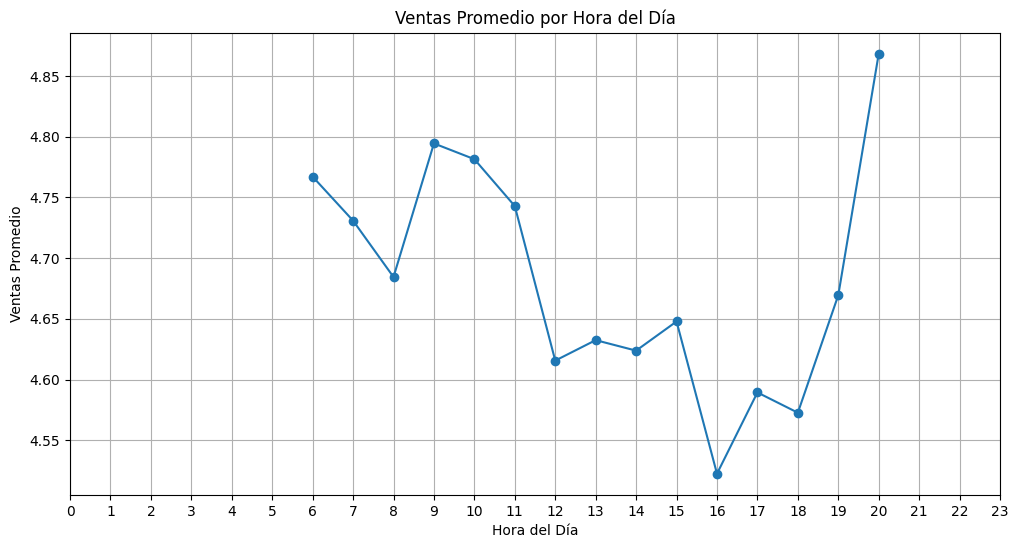

In [17]:
# Extraer la hora directamente del objeto time
df['hour'] = df['transaction_time'].apply(lambda x: x.hour)

# Ventas promedio por hora
hourly_sales = df.groupby('hour')['total_revenue'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o')
plt.title('Ventas Promedio por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Ventas Promedio')
plt.grid(True)
plt.xticks(range(24))  # Mostrar todas las horas del día
plt.show()

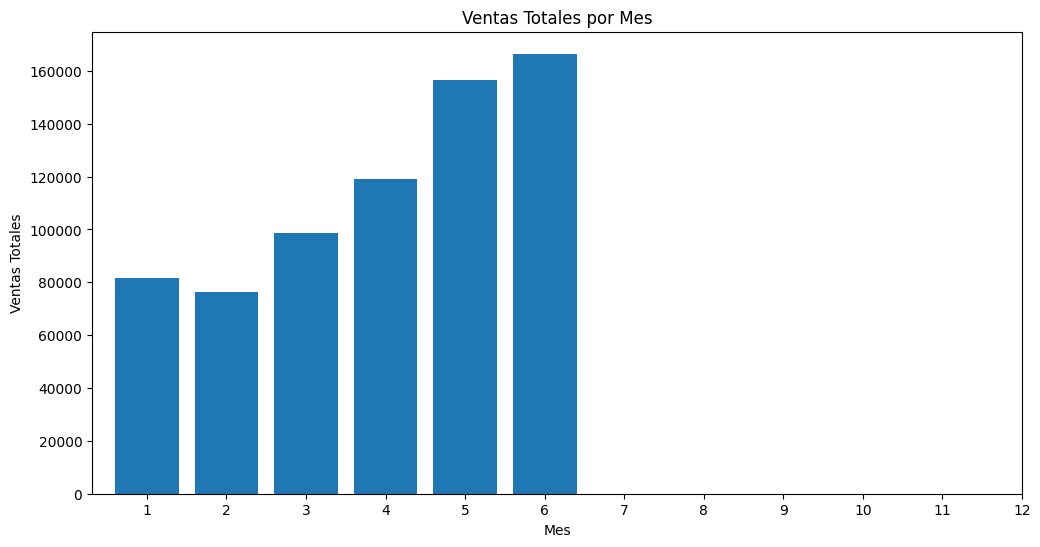

In [18]:
# Extraer el mes
df['month'] = df['transaction_date'].dt.month

# Ventas por mes
monthly_sales = df.groupby('month')['total_revenue'].sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(range(1, 13))
plt.show()

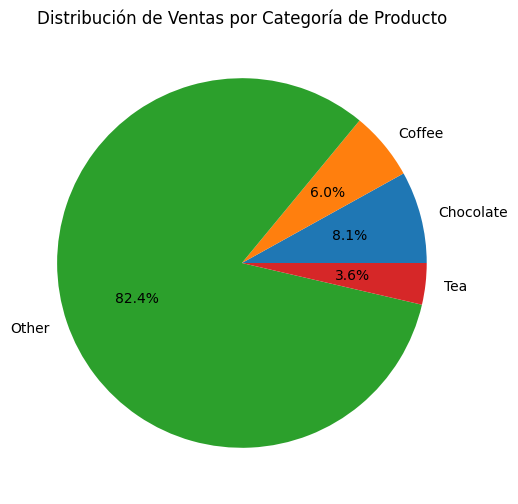

In [19]:
# Crear categorías básicas basadas en el nombre del producto
df['category'] = df['product_detail'].apply(lambda x: 
    'Coffee' if 'coffee' in x.lower() 
    else 'Tea' if 'tea' in x.lower() 
    else 'Chocolate' if 'chocolate' in x.lower() 
    else 'Other')

# Ventas por categoría
category_sales = df.groupby('category')['total_revenue'].sum()

plt.figure(figsize=(10, 6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas por Categoría de Producto')
plt.show()


Estadísticas de Tickets:
count    149116.000000
mean          4.686367
std           4.227099
min           0.800000
25%           3.000000
50%           3.750000
75%           6.000000
max         360.000000
Name: ticket_value, dtype: float64


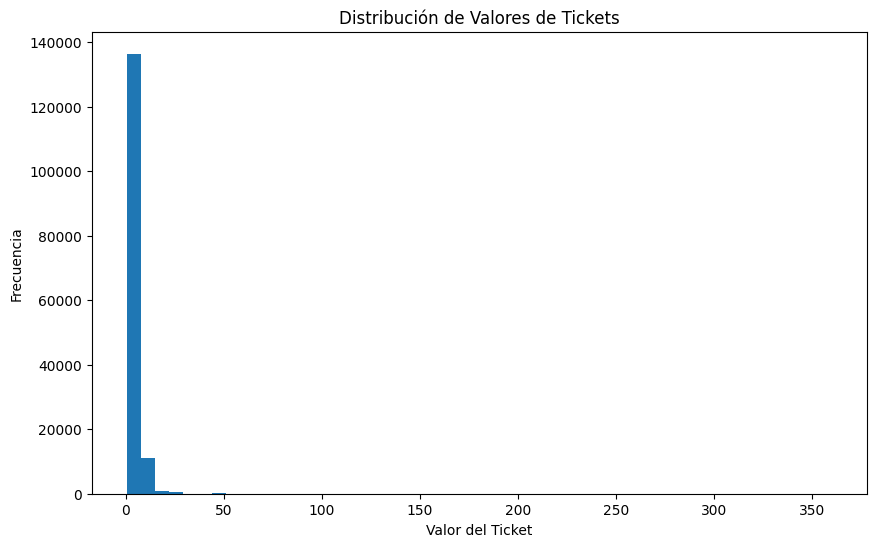

In [20]:
# Calcular el valor promedio por transacción
df['ticket_value'] = df.groupby('transaction_id')['total_revenue'].transform('sum')

# Estadísticas descriptivas del valor de los tickets
ticket_stats = df.groupby('transaction_id')['ticket_value'].first().describe()
print("\nEstadísticas de Tickets:")
print(ticket_stats)

# Histograma de valores de tickets
plt.figure(figsize=(10, 6))
plt.hist(df.groupby('transaction_id')['ticket_value'].first(), bins=50)
plt.title('Distribución de Valores de Tickets')
plt.xlabel('Valor del Ticket')
plt.ylabel('Frecuencia')
plt.show()